In [0]:
import torch
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = (13.0, 5.0)

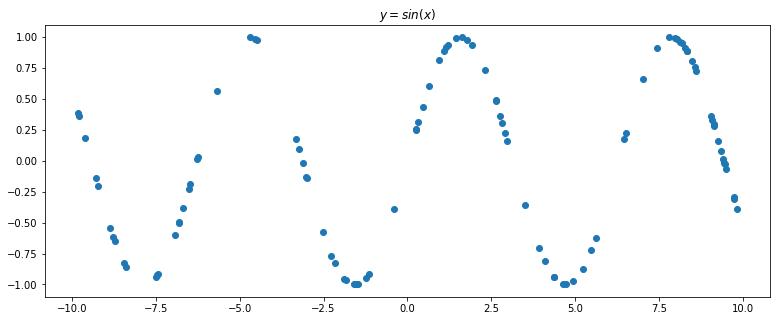

In [2]:
x_train = torch.rand(100)
x_train = x_train * 20.0 - 10.0

y_train = torch.sin(x_train)

plt.plot(x_train.numpy(), y_train.numpy(), 'o')
plt.title('$y = sin(x)$');

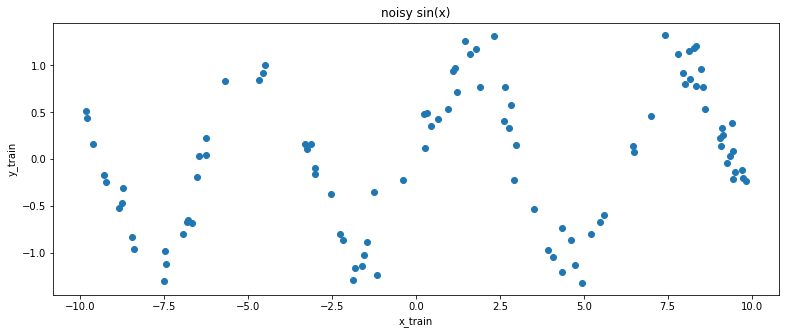

In [3]:
# Добавим шум
noise = torch.randn(y_train.shape) / 5.
y_train = y_train + noise
plt.plot(x_train.numpy(), y_train.numpy(), 'o')
plt.title('noisy sin(x)')
plt.xlabel('x_train')
plt.ylabel('y_train');

In [4]:
# делает из строк столбцы
x_train.unsqueeze_(1)
y_train.unsqueeze_(1)
# пример
tmp = torch.Tensor([1,2,3])
print(tmp)
print(tmp.unsqueeze(1))

tensor([1., 2., 3.])
tensor([[1.],
        [2.],
        [3.]])


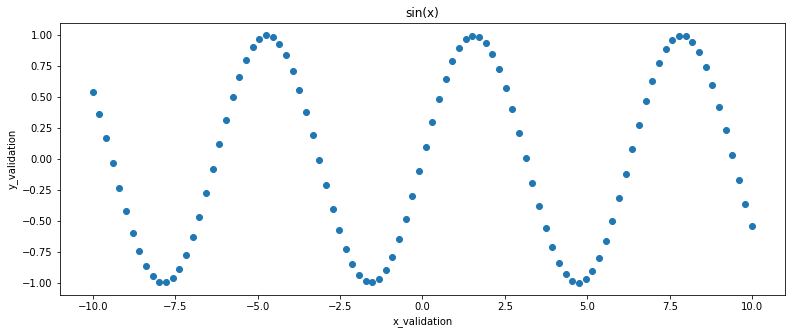

In [5]:
#  Датасет Валидационный
x_validation = torch.linspace(-10, 10, 100)
y_validation = torch.sin(x_validation.data)
plt.plot(x_validation.numpy(), y_validation.numpy(), 'o')
plt.title('sin(x)')
plt.xlabel('x_validation')
plt.ylabel('y_validation');

In [0]:
x_validation.unsqueeze_(1)
y_validation.unsqueeze_(1);

In [0]:
# Класс нейронной сети восстанвления синуса
class SineNet(torch.nn.Module):
    def __init__(self, n_hidden_neurons):
        # n_hidden_neurons - колич скрытых нейронов в каждом слое
        super(SineNet, self).__init__()
        # полносвязный слой 1. 1 входной нейрон и n_hidden_neurons выходных
        self.fc1 = torch.nn.Linear(1, n_hidden_neurons)
        # Функция активации - сигмоида
        self.act1 = torch.nn.Sigmoid()
        # выходной нейрон 1
        self.fc2 = torch.nn.Linear(n_hidden_neurons, 1)

    # функция моделирующая то как наши слои последовательно применяются к вхю данным
    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        return x

sine_net = SineNet(50)

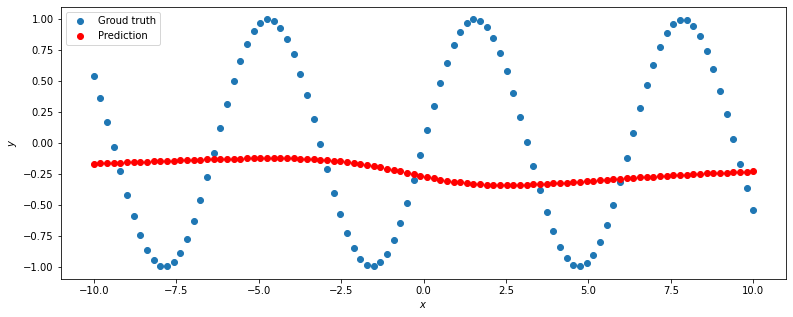

In [8]:
# функция предсказания 
def predict(net, x, y):
    y_pred = net.forward(x)
    # рисуем предикшн
    plt.plot(x.numpy(), y.numpy(), 'o', label='Groud truth')
    plt.plot(x.numpy(), y_pred.data.numpy(), 'o', c='r', label='Prediction');
    plt.legend(loc='upper left')
    plt.xlabel('$x$')
    plt.ylabel('$y$')

predict(sine_net, x_validation, y_validation)
  

In [0]:
# Оптимизатор (для шагов градиентного спуска)
optimizer = torch.optim.Adam(sine_net.parameters(), lr=0.01)


In [0]:
# Функция потерь
def loss(pred, target):
    squares = (pred - target) ** 2
    return squares.mean()


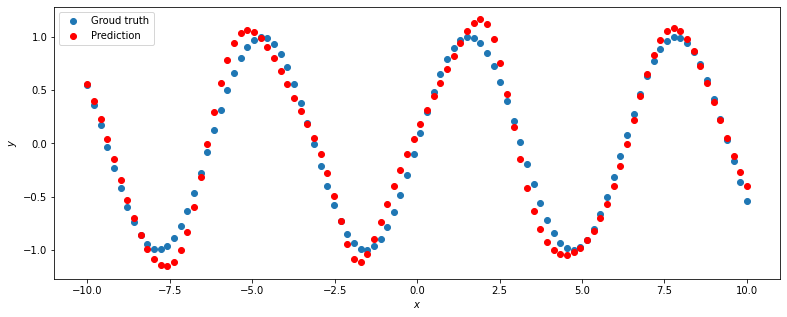

In [11]:
# Тренировка сети
for epoch_index in range(2000):
  # зануляем гадиенты
  optimizer.zero_grad()

  # считаем ответ сети для всего x_train
  y_pred = sine_net.forward(x_train)
  # считаем функцию потерь
  loss_vall = loss(y_pred, y_train)
  # считает градиенты 
  loss_vall.backward()
  # делаем шаг после расчета градиентов
  optimizer.step()

predict(sine_net, x_validation, y_validation)


In [12]:
#

import torch

class RegressionNet(torch.nn.Module):
    def __init__(self):
        super(RegressionNet, self).__init__()
        self.fc1 = torch.nn.Linear(1, 150)
        self.act1 = torch.nn.Sigmoid()
        self.fc2 = torch.nn.Linear(150, 30)
        self.act2 = torch.nn.Sigmoid()
        self.fc3 = torch.nn.Linear(30, 1)

    # функция моделирующая то как наши слои последовательно применяются к вхю данным
    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        x = self.act2(x)
        x = self.fc3(x)
        return x

net = RegressionNet()

def target_function(x):
    return 2**x * torch.sin(2**-x)

# ------Dataset preparation start--------:
x_train =  torch.linspace(-10, 5, 100)
y_train = target_function(x_train)
noise = torch.randn(y_train.shape) / 20.
y_train = y_train + noise
x_train.unsqueeze_(1)
y_train.unsqueeze_(1)

x_validation = torch.linspace(-10, 5, 100)
y_validation = target_function(x_validation)
x_validation.unsqueeze_(1)
y_validation.unsqueeze_(1)
# ------Dataset preparation end--------:

def metric(pred, target):
    return (pred - target).abs().mean()

optimizer = torch.optim.Adam(net.parameters(), lr=0.001)

def loss(pred, target):
    return (pred - target).abs().mean()

for epoch_index in range(2000):
    optimizer.zero_grad()

    y_pred = net.forward(x_train)
    loss_value = loss(y_pred, y_train)
    loss_value.backward()
    optimizer.step()
    # make backward
    # make step

# Проверка осуществляется вызовом функции
print(metric(net.forward(x_validation), y_validation).item())
# (раскомментируйте, если решаете задание локально)

0.024427566677331924


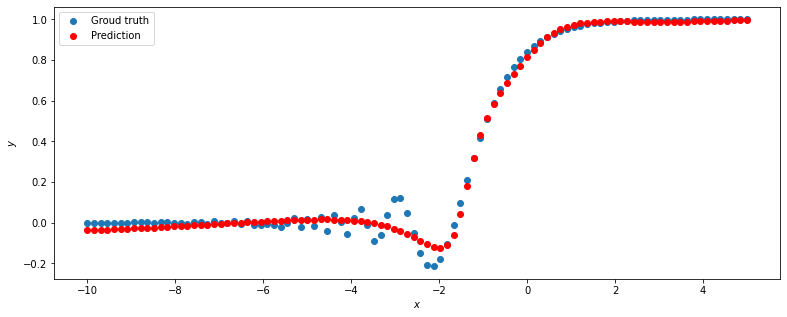

In [13]:
predict(net, x_validation, y_validation)